In [ ]:
# --- [1] Install Library ---
!pip install nltk wordcloud scikit-learn matplotlib seaborn
!pip install textblob
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# --- [2] Load Data ---
df = pd.read_csv('bohemian_rhapsody_comments.csv')
df = df.dropna(subset=["text"])

In [ ]:
# --- [3] Preprocessing ---
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special chars
    text = text.lower()
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
# --- [4] Label Sentimen Manual (contoh sederhana) ---
def label_sentiment_blob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.2:
        return 'positive'
    elif polarity < -0.2:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_text'].apply(label_sentiment_blob)

In [ ]:
# Simpan hasil preprocessing ke CSV
df[['author', 'text', 'clean_text', 'likeCount', 'publishedAt', 'sentiment']].to_csv('cleaned_bohemian_comments.csv', index=False)

# Tampilkan 10 baris pertama sebagai preview
df[['author', 'text', 'clean_text', 'sentiment']].head(10)

,author,text,clean_text,sentiment
0,@Queen,Thank you to all our fans across the World for...,thank fans across world helping us hit one bil...,positive
1,@El_yisus-p1p,oh shit fue hace 16 años,oh shit fue hace aos,neutral
2,@tanniamendoza1677,Feo,feo,neutral
3,@mihg2rdm362,I came from the future! To get too know what w...,came future get know happen need answer one qu...,neutral
4,@agentslime6,0:57 R.I.P Cheeseman,rip cheeseman,neutral
5,@KimTrepp,❤❤❤,,neutral
6,@たにりこ,映画、感動しました❤😂,,neutral
7,@julietemple011,hello people watching this relatively close to me,hello people watching relatively close,neutral
8,@tonykavanagh4850,best song of all time. nothing comes close.,best song time nothing comes close,positive
9,@Animation-w2t,I DID IT LIKE THIS,like,neutral


In [ ]:
# --- [5] TF-IDF + Naive Bayes ---
X = df['clean_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.77
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.76      1.00      0.86       143
    positive       0.92      0.22      0.36        49

    accuracy                           0.77       200
   macro avg       0.56      0.41      0.41       200
weighted avg       0.77      0.77      0.71       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-31-548908945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


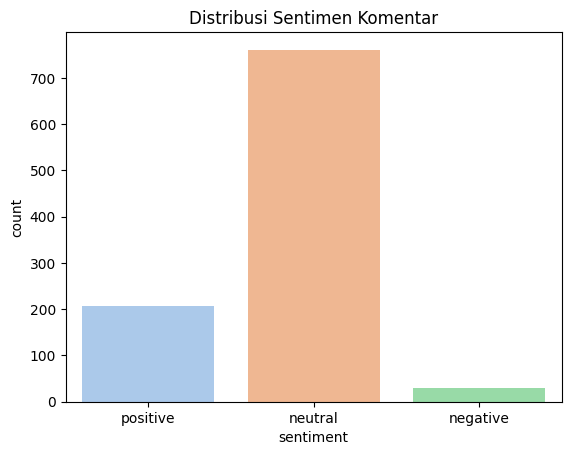

In [ ]:
# --- [6] Visualisasi ---
# Visualisasi Sentimen
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Distribusi Sentimen Komentar")
plt.show()

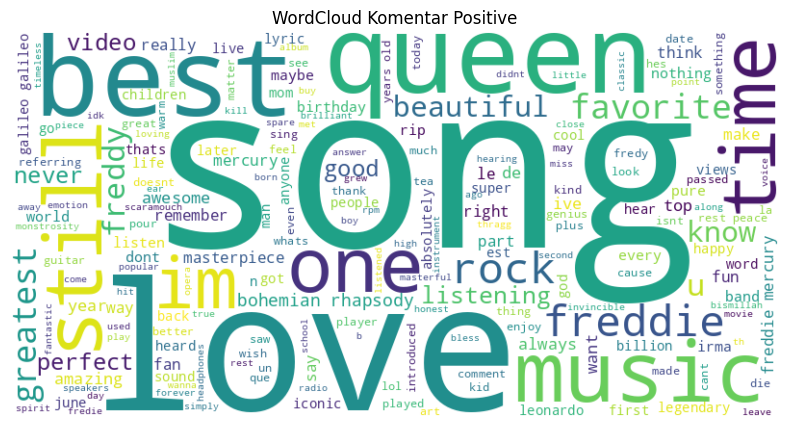

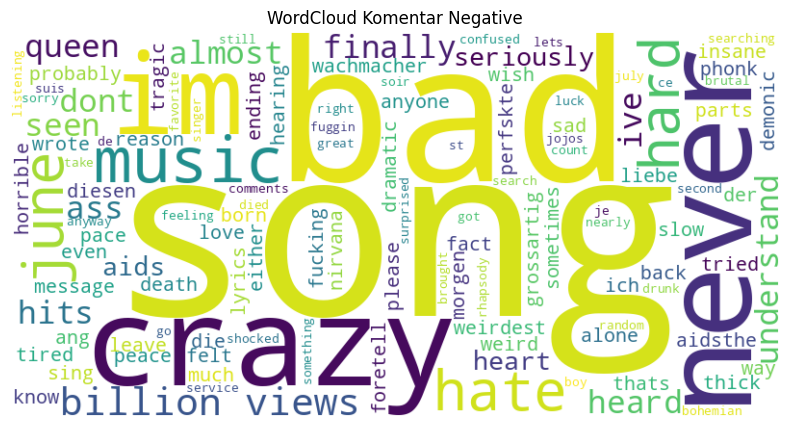

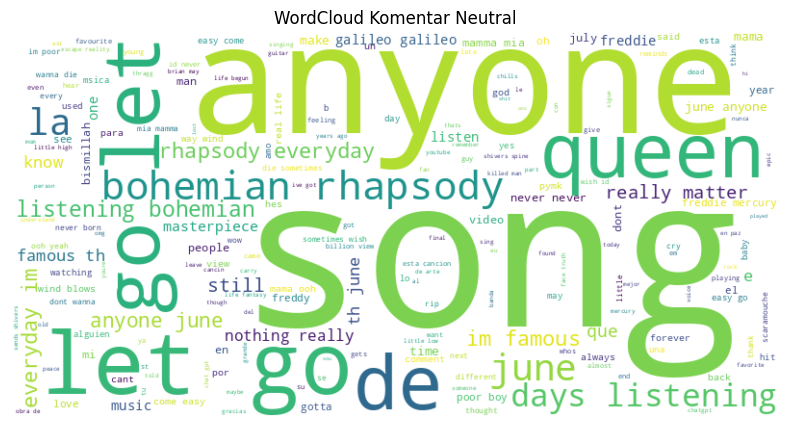

In [ ]:
from wordcloud import WordCloud

for sentiment in ['positive', 'negative', 'neutral']:
    text = " ".join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Komentar {sentiment.capitalize()}")
    plt.show()


/tmp/ipython-input-34-1953630512.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


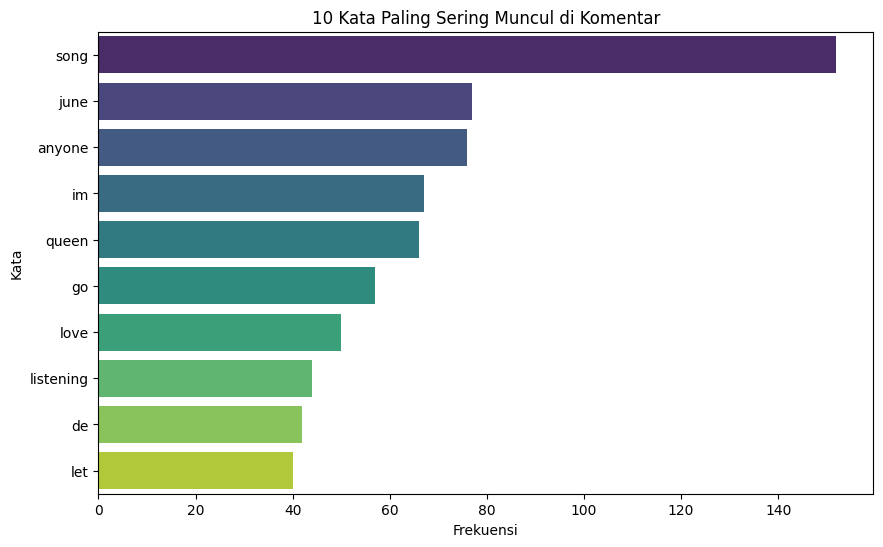

In [ ]:
from collections import Counter

all_words = " ".join(df['clean_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

# Visualisasi
words, counts = zip(*common_words)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title("10 Kata Paling Sering Muncul di Komentar")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()


In [ ]:
# Ambil komentar dengan like terbanyak per kategori
for sentiment in ['positive', 'negative', 'neutral']:
    print(f"\nKomentar {sentiment.upper()} dengan Like Terbanyak:")
    top_comment = df[df['sentiment'] == sentiment].sort_values(by='likeCount', ascending=False).head(1)
    print(top_comment[['author', 'text', 'likeCount', 'publishedAt']].to_string(index=False))



Komentar POSITIVE dengan Like Terbanyak:
author                                                                                                                                 text  likeCount          publishedAt
@Queen Thank you to all our fans across the World for helping us hit ONE BILLION VIEWS. Comment down below your favorite memory of Queen ❤️     494305 2019-07-21T15:23:42Z

Komentar NEGATIVE dengan Like Terbanyak:
     author                                         text  likeCount          publishedAt
@rocky-tina Never get tired of this song even in 2025...          6 2025-06-16T22:31:45Z

Komentar NEUTRAL dengan Like Terbanyak:
       author                 text  likeCount          publishedAt
@kharlamova16 Anyone in June 2025?       3178 2025-06-01T14:56:47Z
